# CarMax Analytics Showcase
- Competition: https://analyticsshowcase.carmax.com
- Data: https://github.com/kmx-analytics-showcase/Winter-2023

In [1]:
import numpy as np
import pandas as pd
from pySankey.sankey import sankey

## Data Load

In [2]:
# load clean data
file = 'data/cleaned_data.pkl'
df = pd.read_pickle(file)
df.shape

(200000, 32)

In [3]:
# data sample
df.sample(5).T

,81750,48660,82449,32870,144217
market,5,1,4,4,7
price,$20k to $25k,$15k to $20k,$35k to $40k,$20k to $25k,$30k to $35k
model_year,2013.0,2013.0,2013.0,2015.0,2014.0
mileage,40k to 45k miles,50k to 55k miles,30k to 35k miles,0 to 5k miles,25k to 30k miles
make,JHO,AIH,FJE,LTX,AIH
model,JHO_4,AIH_25,FJE_9,LTX_6,AIH_13
premium_trim,0,0,1,0,1
body,E,F,E,F,F
color,Black,Red,Gray,Black,White
engine_disp,2.0,1.8,3.6,1.5,3.5


In [4]:
# numeric
df.describe().round(decimals = 1).T

,count,mean,std,min,25%,50%,75%,max
model_year,200000.0,2012.6,2.1,1991.0,2012.0,2013.0,2014.0,2017.0
premium_trim,200000.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
engine_disp,200000.0,2.8,1.1,0.0,2.0,2.5,3.5,7.0
cylinders,200000.0,5.0,1.4,0.0,4.0,4.0,6.0,16.0
mpg,200000.0,25.4,5.3,12.4,21.2,24.7,29.0,57.9
horsepower,200000.0,237.0,76.6,11.0,175.0,228.0,290.0,760.0
fuel_capacity,200000.0,17.6,4.3,1.0,14.0,17.0,19.0,48.0
online_appraisal_flag,200000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
model_year_appraisal,200000.0,2007.8,4.9,1986.0,2005.0,2009.0,2012.0,2017.0
premium_trim_appraisal,200000.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [5]:
# non-numeric
df.describe(include = ['object','category']).T

,count,unique,top,freq
market,200000,16,14,19729
price,200000,13,$20k to $25k,46388
mileage,200000,21,25k to 30k miles,18740
make,200000,37,AIH,26201
model,200000,575,HXQ_8,5528
body,200000,6,E,115268
color,200000,16,White,45231
price_appraisal,200000,9,$0k to $5k,69180
mileage_appraisal,200000,21,50k to 60k miles,14163
make_appraisal,200000,38,KQZ,21886


## Analysis Methodology

- We're starting with 13 features on a car
    - price
    - condition
        - model_year
        - mileage
    - taste
        - make
        - model
        - premium_trim
        - body
        - color
    - kinetic features
        - engine_disp
        - cylinders
        - mpg
        - horsepower
        - fuel_capacity

## Price
- This is the net revenue of an appraisal-to-purchase customer
- ~$5.9k average

### Appraisal Price

$0k to $5k      69180
$5k to $10k     38688
$10k to $15k    28387
$15k to $20k    23102
$20k to $25k    16791
$25k to $30k    10374
$30k to $35k     6093
$35k to $40k     3690
$40k+            3695
Name: price_appraisal, dtype: int64


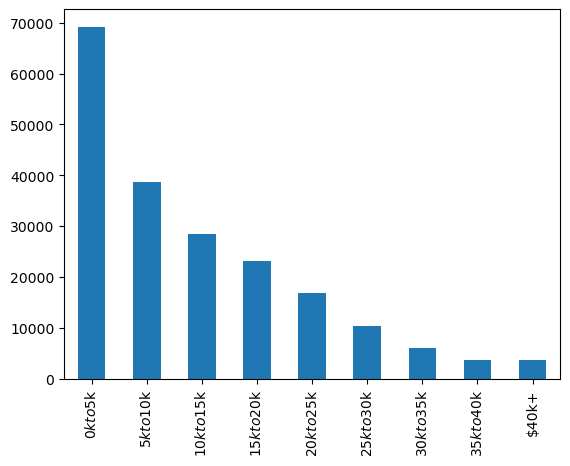

In [6]:
# appraisal offer on "old" vehicle distribution
price_appraisal = df['price_appraisal'].value_counts().sort_index()
print(price_appraisal)
ax = price_appraisal.plot.bar()

### Purchase Price

$0 to $15k       8841
$15k to $20k    34577
$20k to $25k    46388
$25k to $30k    40420
$30k to $35k    28407
$35k to $40k    20076
$40k to $45k    10697
$45k to $50k     5439
$50k to $55k     2415
$55k to $60k     1305
$60k to $65k      590
$65k to $70k      359
$70k+             486
Name: price, dtype: int64


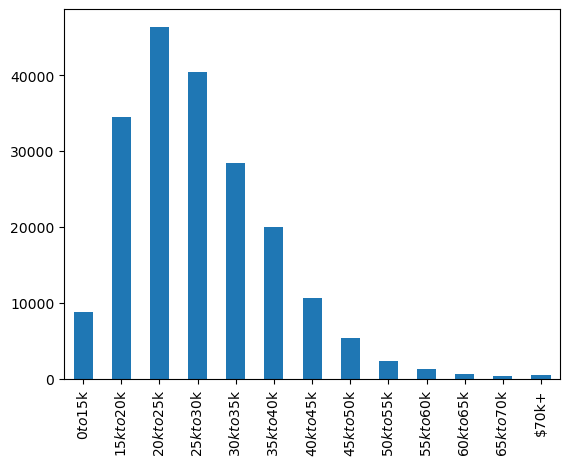

In [7]:
# purchase price of "new" vehicle distribution
price = df['price'].value_counts().sort_index()
print(price)
ax = price.plot.bar()

### Appraisal to Purchase Price

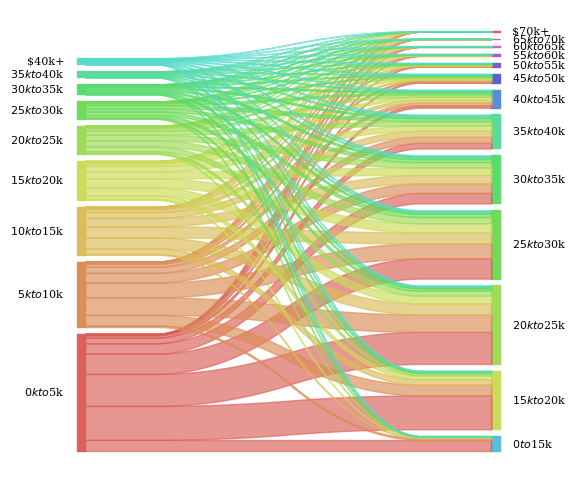

In [8]:
# movement from appraisal offer to purchase price

df = df.sort_values(by=['price_appraisal','price'])
sankey(df['price_appraisal'], df['price'], aspect=40, fontsize=8)

In [9]:
# code price ranks
df['price_appraisal_rank'] = df['price_appraisal'].cat.codes
df['price_rank'] = df['price'].cat.codes

In [10]:
# difference between customer appraisal and purchase prices
df['price_delta'] = (df['price_rank'] - df['price_appraisal_rank'])
df['price_delta'].describe().round(decimals = 1)

count    200000.0
mean          1.2
std           2.2
min          -8.0
25%           0.0
50%           1.0
75%           2.0
max          12.0
Name: price_delta, dtype: float64

In [11]:
df['price_delta'].mean()*5

5.8968

## Condition

### Model Year

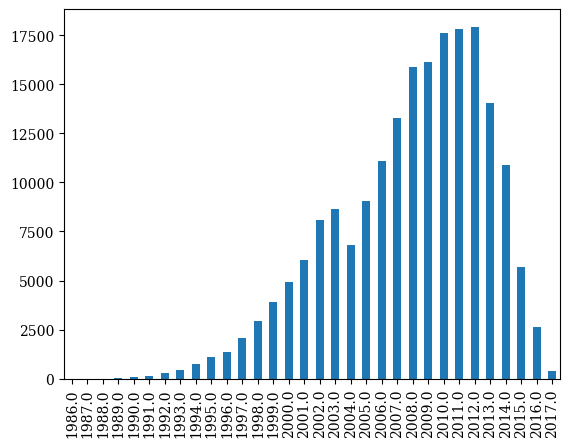

In [12]:
# "old" vehicle model year distribution
model_year_appraisal = df['model_year_appraisal'].value_counts().sort_index()
# print(model_year_appraisal)
ax = model_year_appraisal.plot.bar()

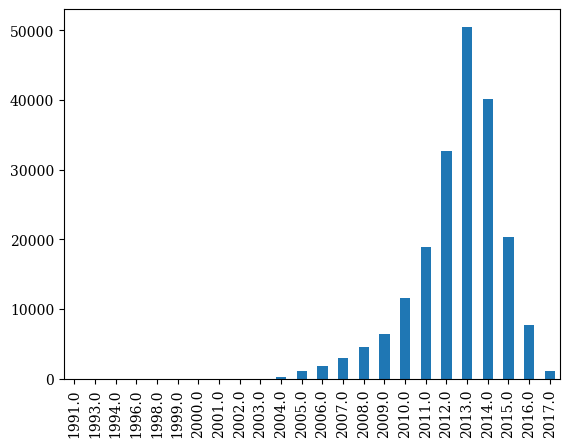

In [13]:
# "new" vehicle model year distribution
model_year = df['model_year'].value_counts().sort_index()
# print(model_year_appraisal)
ax = model_year.plot.bar()

In [14]:
year_delta = df['model_year'] - df['model_year_appraisal']
year_delta.describe().round(decimals = 1)

count    200000.0
mean          4.7
std           4.9
min         -21.0
25%           1.0
50%           4.0
75%           8.0
max          27.0
dtype: float64

### Mileage

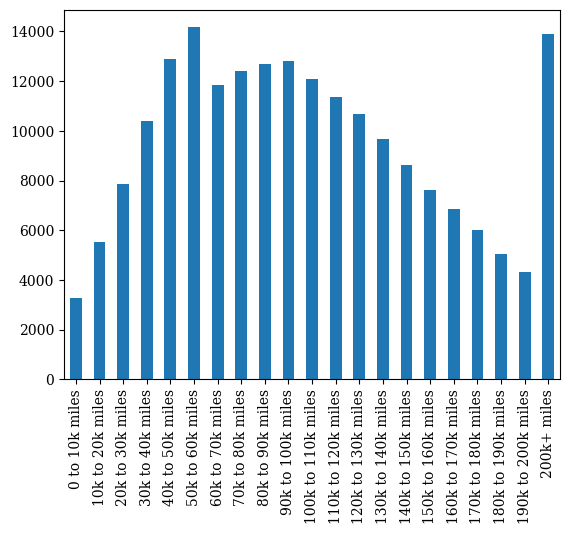

In [15]:
# mileage of "old" vehicle distribution
mileage_appraisal = df['mileage_appraisal'].value_counts().sort_index()
#print(mileage_appraisal)
ax = mileage_appraisal.plot.bar()

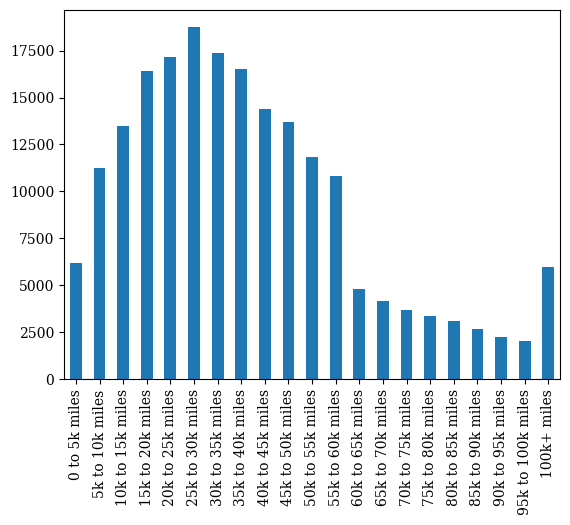

In [16]:
# mileage of "new" vehicle distribution
mileage = df['mileage'].value_counts().sort_index()
#print(mileage)
ax = mileage.plot.bar()

## Taste

### Premium Trim
- Customer preferences on trim

In [17]:
# trim change from old to new
trim_change = (df['premium_trim'] - df['premium_trim_appraisal']).value_counts()
trim_change_pct = (trim_change/trim_change.sum()).round(decimals = 2)

In [18]:
pd.DataFrame(data = {'Count':list(trim_change), 'Percent':list(trim_change_pct)}, index=['Same','Upgrade','Downgrade'])

,Count,Percent
Same,117934,0.59
Upgrade,51476,0.26
Downgrade,30590,0.15


### Body
- Customer body preference
- 47% keep same body

In [19]:
print(df['body'].value_counts().sort_index())
print(df['body_appraisal'].value_counts().sort_index())

A       921
B      5305
D     20001
E    115268
F     52259
G      6246
Name: body, dtype: int64
A     1983
B     7541
C    10252
D    15626
E    77597
F    75146
G     7470
H     4385
Name: body_appraisal, dtype: int64


In [20]:
df['same_body'] = np.where(df['body'].astype('str') == df['body_appraisal'].astype('str'), 1, 0)

In [21]:
df['same_body'].mean()

0.47013

### Make
- Brand loyalty
- 18% of customers keep the same make. I would call this low brand loyalty.

In [22]:
# customer buys same brand
df['same_make'] = np.where(df['make'].astype('str') == df['make_appraisal'].astype('str'), 1, 0)

In [23]:
df['same_make'].mean()

0.180895

## Kinetics
- These are the aspects of the vehicle that relate to movement:
    - engine_disp, cylinders, mpg, horsepower, fuel_capacity

In [24]:
# collect all kinetic features observations (both "old" and "new" vehicles from each observation)
k1 = df[['engine_disp','cylinders','mpg','horsepower','fuel_capacity']]
k2 = df[['engine_disp_appraisal','cylinders_appraisal','mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal']]
k2.columns = k1.columns
kinetics_all = pd.concat([k1,k2], axis=0, ignore_index=True)

In [25]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(kinetics_all)
print(pca.explained_variance_ratio_)


[0.9959136]


In [26]:
# construct new variables

kinetics = pca.transform(k1)
df.insert(df.columns.get_loc('engine_disp'), 'kinetics', kinetics)

kinetics_appraisal = pca.transform(k2)
df.insert(df.columns.get_loc('engine_disp_appraisal'), 'kinetics_appraisal', kinetics_appraisal)

In [27]:
# correlation between "old" and "new" vehicle kinetics
print(df['kinetics_appraisal'].corr(df['kinetics']))

0.36238450478127915


<AxesSubplot:xlabel='kinetics_appraisal', ylabel='kinetics'>

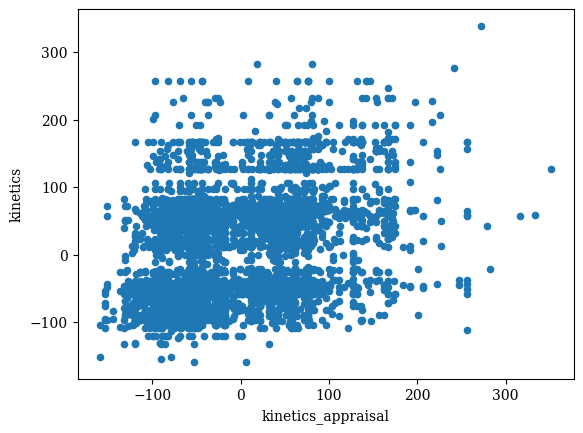

In [32]:
df.sample(5000).plot.scatter(x='kinetics_appraisal', y='kinetics')

In [28]:
df.sample(5).T

,72226,144736,196666,193804,177318
market,8,8,11,5,4
price,$25k to $30k,$45k to $50k,$35k to $40k,$15k to $20k,$20k to $25k
model_year,2013.0,2012.0,2012.0,2010.0,2013.0
mileage,30k to 35k miles,10k to 15k miles,25k to 30k miles,65k to 70k miles,25k to 30k miles
make,JDZ,CFK,CFK,OFW,CZV
model,JDZ_33,CFK_5,CFK_5,OFW_6,CZV_10
premium_trim,0,1,1,0,1
body,F,E,E,F,E
color,White,Silver,White,Red,Blue
kinetics,-20.729753,57.079471,57.079471,-83.800677,-41.463386
